# Importing Libraries and Data

In [2]:
import pandas as pd
from datasets import load_dataset
the_lukbarset=load_dataset('lukebarousse/data_jobs')
data_fram=the_lukbarset['train'].to_pandas()
data_fram['job_posted_date']=pd.to_datetime(data_fram.job_posted_date)
data_fram
data_fram1=data_fram.copy()
import ast
import matplotlib.pyplot as plt
data_fram1['job_skills']=data_fram1['job_skills'].apply(lambda skill:ast.literal_eval(skill) if pd.notna(skill) else skill)
data_fram1=data_fram1[(data_fram1['job_country']=='India') & (data_fram1['job_title_short']=='Data Analyst')]

# Skill trend throught the Month 

## arrange skill count monthly

In [3]:

data_fram1['job_month']=data_fram1['job_posted_date'].dt.month_name()
data_fram1=data_fram1.explode('job_skills')
data_fram12=data_fram1.copy()
data_fram12=data_fram12[data_fram12['job_skills'].notna()]
pivot_table_req=data_fram12.pivot_table(columns='job_skills',index='job_month',aggfunc='size')
pivot_table_req=pivot_table_req.fillna(0)
pivot_table_req=pivot_table_req.reset_index()
pivot_table_req['month_no']=pd.to_datetime(pivot_table_req['job_month'],format='%B').dt.month
pivot_table_req.set_index('month_no',inplace=True)
pivot_table_req.sort_index(inplace=True)
pivot_table_req.set_index('job_month',inplace=True)
pivot_table_req.loc['total_sum']=pivot_table_req.sum(axis=0)
pivot_table_req_transposed=pivot_table_req.T

pivot_table_req_transposed=pivot_table_req_transposed.reset_index()
pivot_table_req_transposed=pivot_table_req_transposed.set_index('total_sum')
pivot_table_req_transposed=pivot_table_req_transposed.sort_index(ascending=False)
pivot_table_req_transposed=pivot_table_req_transposed.set_index('job_skills')
pivot_table_req_2=pivot_table_req_transposed.T
pivot_table_req_2



job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,ringcentral,rshiny,suse,ubuntu,twilio,typescript,vue.js,unreal,wrike,workfront
job_month,,,,,,,,,,,,,,,,,,,,,
January,305.0,216.0,218.0,159.0,98.0,89.0,128.0,46.0,32.0,43.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
February,209.0,148.0,156.0,116.0,75.0,67.0,82.0,26.0,33.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
March,229.0,151.0,138.0,125.0,76.0,58.0,62.0,45.0,38.0,29.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
April,204.0,143.0,138.0,98.0,83.0,56.0,52.0,40.0,31.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
May,155.0,101.0,106.0,71.0,61.0,42.0,30.0,33.0,22.0,19.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
June,193.0,150.0,115.0,114.0,77.0,76.0,74.0,37.0,32.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
July,245.0,161.0,174.0,124.0,93.0,67.0,78.0,39.0,31.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
August,317.0,216.0,192.0,152.0,127.0,112.0,98.0,52.0,63.0,40.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
September,341.0,229.0,228.0,195.0,168.0,100.0,92.0,35.0,41.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
top_skills=pivot_table_req.loc['total_sum'].sort_values(ascending=False).head(6).index.to_list()
top_skills

import seaborn as sns
pivot_table_req_2

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,ringcentral,rshiny,suse,ubuntu,twilio,typescript,vue.js,unreal,wrike,workfront
job_month,,,,,,,,,,,,,,,,,,,,,
January,305.0,216.0,218.0,159.0,98.0,89.0,128.0,46.0,32.0,43.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
February,209.0,148.0,156.0,116.0,75.0,67.0,82.0,26.0,33.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
March,229.0,151.0,138.0,125.0,76.0,58.0,62.0,45.0,38.0,29.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
April,204.0,143.0,138.0,98.0,83.0,56.0,52.0,40.0,31.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
May,155.0,101.0,106.0,71.0,61.0,42.0,30.0,33.0,22.0,19.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
June,193.0,150.0,115.0,114.0,77.0,76.0,74.0,37.0,32.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
July,245.0,161.0,174.0,124.0,93.0,67.0,78.0,39.0,31.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
August,317.0,216.0,192.0,152.0,127.0,112.0,98.0,52.0,63.0,40.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
September,341.0,229.0,228.0,195.0,168.0,100.0,92.0,35.0,41.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


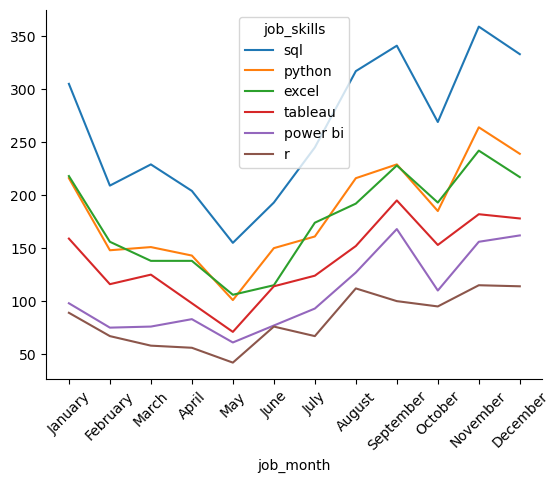

In [5]:
sns.lineplot(data=pivot_table_req_2[top_skills],dashes=False)
plt.xticks(rotation=45)
sns.despine()

### converting it into percentage

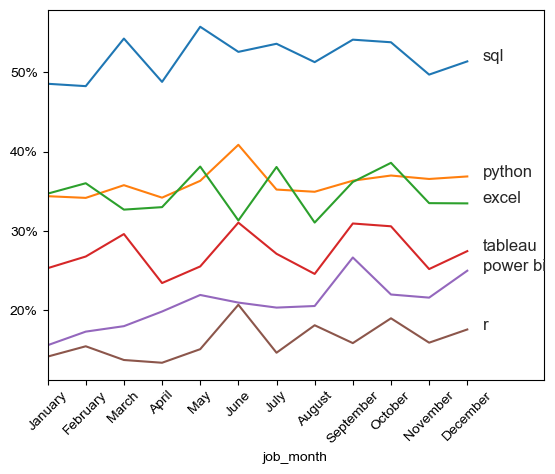

In [6]:
data_fram_count=data_fram.copy()
data_fram_count=data_fram_count[(data_fram_count['job_country']=='India') & (data_fram_count['job_title_short']=='Data Analyst')]
data_fram_count['job_month']=data_fram_count['job_posted_date'].dt.month_name()
data_fram_count['month_no']=pd.to_datetime(data_fram_count['job_month'],format="%B").dt.month
merger_frame2=data_fram_count.groupby(['month_no','job_month']).agg('size').reset_index(name='count')
merger_frame2=merger_frame2.set_index('month_no')
merger_frame2=merger_frame2.set_index('job_month')
merger_frame2

merged_frame=pivot_table_req_2[top_skills].merge(right=merger_frame2,on='job_month')

skills_list=merged_frame.columns.drop('count').to_list()
merged_frame[skills_list]=merged_frame[skills_list].div((merged_frame['count']*0.01),axis=0)
merged_frame
merged_frame_final=merged_frame.copy()
merged_frame_final=merged_frame_final.drop(columns='count')
merged_frame_final
from matplotlib.ticker import PercentFormatter 
sns.lineplot(data=merged_frame_final,dashes=False,legend='full',palette='tab10')
plt.xticks(rotation=45)
sns.set_theme()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.legend().remove()
plt.Figure(figsize=(10,5))
plt.xlim(0,13)
for i,skill in enumerate(top_skills):
 plt.text(11.4,merged_frame_final.iloc[-1,i],merged_frame_final.columns[i])# important remember plt.text(x,y,text) we specify the x coordinate the y coordinate and the text we give


In [ ]:
merr

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_month
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc",sql,"{'analyst_tools': ['power bi', 'excel', 'word'...",July
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc",python,"{'analyst_tools': ['power bi', 'excel', 'word'...",July
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc",databricks,"{'analyst_tools': ['power bi', 'excel', 'word'...",July
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc",power bi,"{'analyst_tools': ['power bi', 'excel', 'word'...",July
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc",excel,"{'analyst_tools': ['power bi', 'excel', 'word'...",July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,shell,"{'analyst_tools': ['tableau', 'microstrategy']...",January
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,sql server,"{'analyst_tools': ['tableau', 'microstrategy']...",January
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,tableau,"{'analyst_tools': ['tableau', 'microstrategy']...",January
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,microstrategy,"{'analyst_tools': ['tableau', 'microstrategy']...",January
